In [23]:
# modulos y librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None


In [24]:
catalog.list()

['hado_22',
 'hado_21',
 'hado_20',
 'hado_19',
 'hado_18',
 'hado_17',
 'hado_concat',
 'hado_concat_clean',
 'hado_values',
 'parameters']

In [25]:
df = catalog.load('hado_concat_clean')

[06/27/23 16:01:17] INFO     Loading data from 'hado_concat_clean' (CSVDataSet)...              data_catalog.py:345

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\pandas\io\parsers\c_                
                             parser_wrapper.py:373: DeprecationWarning:                                            
                                                                                                                   
                             np.find_common_type is deprecated.  Please use `np.result_type` or                    
                             `np.promote_types`.                                                                   
                             See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs                  
                             for more information.  (Deprecated NumPy 1.25)                                        
                                                                                                                   
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\kedro\extras\dataset                
                             s\pandas\csv_dataset.py:161: DtypeWarning:                                            
                                                                                                                   
                             Columns (3,6,7,12,13,14,18,19,20,21,22,34) have mixed types. Specify                  
                             dtype option on import or set low_memory=False.                                       
                                                                                                                   
                                                                                                                   

In [26]:
# Funcion para limpiar los datos del dataframe
import string

def clean_text(df):
    
    def data_strip(df):
        '''Quitamos los espacios del principio y final de los datos'''
    for column in df:
        df[column] = df[column].replace(r"^ +| +$",r"", regex = True) 
    data_strip(df)
    
    def to_lowercase(df):
        '''Pasamos todo a minúsculas'''
    for column in df:
        if df[column].dtype == 'object':  # comprueba si la columna es de tipo 'object'
            df[column] = df[column].str.lower()
            
    to_lowercase(df)
    
    import string

    def remove_punctuation(df):
        '''Quitamos los signos de puntuación'''
        for column in df:
            if df[column].dtype == 'object':  # comprueba si la columna es de tipo 'object'
                df[column] = df[column].str.translate(str.maketrans("", "", string.punctuation))
    
    remove_punctuation(df)

# Probar más formas de limpieza

1. Agrupar diagnósticos [Cancer, Ictus, respiratorios ...]
2. NaN en media, mediana, eliminandolos ...

In [27]:
def value_counts_normalized(df):
    for column in df.columns:
        print(round(df[column].value_counts(normalize=True).sort_values(ascending=False), ndigits=3))
        
value_counts_normalized(df)

clinico                 0.381
no                      0.311
clínico                 0.163
conxo                   0.082
gil casares             0.036
clincio                 0.011
provincial              0.003
hgc                     0.002
cliinico                0.002
chuac                   0.001
residencia              0.001
si                      0.001
clnico                  0.000
san rafael la coruña    0.000
hula                    0.000
salnes                  0.000
clincico                0.000
hcg                     0.000
ap                      0.000
quiron la coruña        0.000
rosaleda                0.000
clinicoap               0.000
clinoco                 0.000
lucus augusti           0.000
pontevedra              0.000
hm                      0.000
hm rosaleda             0.000
Name: h_procedencia, dtype: float64
no                                     0.305
mir                                    0.120
onc                                    0.118
urg                

santiago                  0.399
lalin                     0.091
ames                      0.085
teo                       0.074
la estrada                0.029
padron                    0.021
ordenes                   0.018
rois                      0.018
boqueixon                 0.016
silleda                   0.016
rianxo                    0.015
negreira                  0.014
a baña                    0.013
brión                     0.013
vedra                     0.012
trazo                     0.012
oroso                     0.012
noia                      0.011
lalín                     0.010
brion                     0.010
santiago de compostela    0.010
val do dubra              0.009
touro                     0.009
estrada                   0.009
o pino                    0.008
ordes                     0.008
a estrada                 0.008
valga                     0.008
lousame                   0.007
pontecesures              0.007
noya                      0.006
padrón  

In [28]:
df['diagnostico'].value_counts(normalize=True).sort_values(ascending=False)

itu                                                                                                                                                                                                                             0.042882
infeccion respiratoria                                                                                                                                                                                                          0.024433
infeccion urinaria                                                                                                                                                                                                              0.021192
icc                                                                                                                                                                                                                             0.017203
cancer de colon                                                     

Una vez realizada la limpieza y preprocesamiento
## Hacemos la vectorización de texto

La vectorización de texto es el proceso de convertir palabras en vectores numéricos que pueden ser entendidos y procesados por un algoritmo de machine learning. Existen diferentes técnicas para hacer esto, entre las que se incluyen Bag of Words, TF-IDF, y Word2Vec.

>Word2Vec es un método que utiliza redes neuronales para aprender representaciones vectoriales de palabras a partir de un corpus de texto. Este método tiene la ventaja de que puede capturar el significado semántico de las palabras.

Tenemos que convertir los diagnosticos en una lista de listas haciendo un split de la variable 
```python
diagnosticos = df['diagnosticos'].unique()`
```

In [29]:
# %pip install gensim

In [30]:
# Vemos si hay NAs

df['diagnostico'].isna().sum()

15

In [31]:
# Rellenamos en blanco para los NAs
df['diagnostico'] = df['diagnostico'].fillna('')

In [32]:
df['diagnostico'].isna().sum()

0

In [33]:
# Hacemos una lista de listas para poder pasar los textos a vectores

diagnosticos = df['diagnostico'].unique()

diagnosticos_split = [diagnostico.split() for diagnostico in diagnosticos]

# Word2Vec

Word2Vec es una técnica específica que se utiliza para el aprendizaje automático de representaciones de palabras. En esencia, convierte palabras en vectores de números de tal manera que las palabras con significados similares terminan con vectores similares. Esto permite que las operaciones matemáticas se realicen en palabras, lo que puede ser muy útil para muchas tareas de NLP.



In [34]:
from gensim.models import Word2Vec

# Asumiendo que tus diagnósticos ya están preprocesados y almacenados en una lista de listas,
# donde cada lista interna contiene las palabras de un diagnóstico.
# Por ejemplo: [["neoplasia", "pancreas"], ["adenocarcinoma", "de", "pulmón"], ...]

# Entrenamos el modelo Word2Vec
model = Word2Vec(diagnosticos_split, min_count=1, vector_size=50)

# Ahora podemos obtener el vector de una palabra en particular
vector = model.wv['cancer']

# O incluso obtener la palabra más similar a 'neoplasia'
similar = model.wv.most_similar('cancer')


### En el código anterior, min_count es el número mínimo de veces que una palabra debe aparecer en el corpus para ser incluida en el modelo, y vector_size es la dimensión de los vectores de palabra.

In [35]:
similar

[('tragar', 0.4741361737251282),
 ('cefalea', 0.39692798256874084),
 ('permante', 0.3931853473186493),
 ('trombosis', 0.39022156596183777),
 ('proteicacalorica', 0.3719976842403412),
 ('terminal', 0.3715527653694153),
 ('miller', 0.3700144588947296),
 ('marsa', 0.3668956756591797),
 ('eiv', 0.36646607518196106),
 ('inmunodeficiencia', 0.3609604835510254)]

In [36]:
vector

array([ 0.00258732, -0.00493039, -0.01349284, -0.01580569, -0.01832999,
       -0.01453994, -0.00172745, -0.0063332 , -0.01626626, -0.00802511,
        0.00774732, -0.01042108,  0.01785214,  0.00353063, -0.01602911,
        0.01974491,  0.01753875,  0.01159043, -0.01701395,  0.00950807,
        0.00918729,  0.01215589,  0.01157652,  0.00119253, -0.00568783,
        0.0175608 ,  0.01783684,  0.00813113, -0.007136  ,  0.000598  ,
        0.00186863, -0.01632043, -0.01693073, -0.00026372,  0.00131654,
       -0.00963311, -0.00783217, -0.01382633,  0.01802728, -0.00094374,
       -0.00770927,  0.01127851,  0.01872947, -0.00916312,  0.01901778,
        0.01120827,  0.01064556, -0.00018737,  0.01763878, -0.01348341],
      dtype=float32)

Word2Vec(diagnosticos_split, min_count=1, vector_size=50): Se está entrenando un modelo Word2Vec con los diagnósticos. La opción min_count=1 significa que las palabras que aparecen al menos una vez en los diagnósticos serán consideradas por el modelo, y vector_size=50 define la dimensionalidad de los vectores de palabras generados por el modelo.

model.wv['cancer']: Devuelve el vector de la palabra 'cancer'. Este vector es un arreglo de 50 números (porque se ha definido vector_size=50) que representa el significado de 'cancer' según lo aprendido por el modelo de los diagnósticos.

model.wv.most_similar('cancer'): Devuelve las palabras más similares a 'cancer' según lo aprendido por el modelo de los diagnósticos. La similitud se mide en términos de la similitud del coseno entre los vectores de palabras.

A tener en cuenta: El modelo Word2Vec necesita una gran cantidad de datos para aprender representaciones de palabras significativas. Si solo existe un pequeño número de diagnósticos, los vectores de palabras generados por el modelo podrían no ser muy significativos. En este caso, se puede considerar el uso de vectores de palabras pre-entrenados, como los disponibles en bibliotecas como spaCy o gensim.

# Gensim

Gensim es una biblioteca de Python muy popular para el modelado de temas y el procesamiento del lenguaje natural (NLP). Proporciona implementaciones eficientes y escalables de varios algoritmos de NLP, como Word2Vec, FastText, Latent Semantic Analysis (LSA), Latent Dirichlet Allocation (LDA) y otros.

Gensim es una opción popular para usar Word2Vec por varias razones:

1. Eficiencia: Gensim está diseñado para ser eficiente y para manejar grandes conjuntos de datos. Utiliza técnicas como la transmisión de datos y la segmentación de memoria para mantener una huella de memoria baja.

2. Facilidad de uso: Gensim proporciona una interfaz simple y directa para el uso de algoritmos de NLP complejos como Word2Vec.

3. Flexibilidad: Gensim permite un control detallado sobre los parámetros de los modelos, lo que puede ser útil para ajustar el rendimiento del modelo para tareas específicas.

4. Comunidad de apoyo: Gensim es una biblioteca muy utilizada con una gran comunidad de usuarios y desarrolladores. Esto significa que hay una gran cantidad de documentación, tutoriales y soporte disponible.

En cuanto a por qué Word2Vec y Gensim son buenas elecciones para el análisis de diagnósticos médicos, hay varias razones. Primero, los diagnósticos médicos a menudo contienen términos y frases muy específicos, y Word2Vec puede ser útil para capturar las similitudes semánticas entre estos términos. Además, Gensim es una opción práctica porque permite un manejo eficiente de grandes conjuntos de datos, que a menudo se encuentran en aplicaciones médicas. Por último, la capacidad de Gensim para ajustar detalladamente los parámetros del modelo puede ser útil para afinar el rendimiento del modelo en el análisis de diagnósticos médicos.


# Enfoque TF-IDF

No todos los diagnósticos tendrán el mismo número de palabras, y algunos diagnósticos pueden tener palabras que son más importantes que otras para determinar el significado del diagnóstico. En estos casos, tomar el promedio de los vectores de palabras puede no ser la mejor representación.

Una opción es usar un enfoque más sofisticado como TF-IDF (Term Frequency-Inverse Document Frequency) para dar más peso a las palabras que son más importantes en un diagnóstico y menos peso a las palabras que son comunes en muchos diagnósticos.

> Pero, en muchos casos, palabras comunes como "cancer" o "infeccion" son de hecho muy importantes para el diagnóstico, y el enfoque TF-IDF puede darles menos peso porque son comunes.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
import time

start_time = time.time()

# Convertimos los diagnósticos a cadenas de texto para usar con TfidfVectorizer
diagnosticos_str = [' '.join(diagnostico) for diagnostico in diagnosticos_split]

# Entrenamos el modelo Word2Vec
model = Word2Vec(diagnosticos_split, min_count=1, vector_size=50)

# Creamos un diccionario para mapear cada palabra a su vector Word2Vec
word_to_vec = {word: model.wv[word] for word in model.wv.key_to_index.keys()}

# Crea un vectorizador TF-IDF, limitando el vocabulario a las palabras que están en el modelo Word2Vec
vectorizer = TfidfVectorizer(vocabulary=model.wv.key_to_index)

# Calcula los vectores TF-IDF para los diagnósticos
tfidf = vectorizer.fit_transform(diagnosticos_str)

# Ahora podemos obtener el vector TF-IDF para cada diagnóstico
diagnosticos_vec = []
for i in range(tfidf.shape[0]):
    tfidf_diag = tfidf.getrow(i)
    diag_vec = np.mean([word_to_vec[word] * tfidf_diag[0, vectorizer.vocabulary_[word]] 
                        for word in diagnosticos_split[i] if word in word_to_vec], axis=0)
    diagnosticos_vec.append(diag_vec)

end_time = time.time()
execution_time = end_time - start_time
print(f"Tiempo de ejecución: {execution_time} segundos")

[06/27/23 16:01:18] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\numpy\core\fromnumer                
                             ic.py:3504: RuntimeWarning:                                                           
                                                                                                                   
                             Mean of empty slice.                                                                  
                                                                                                                   
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\numpy\core\_methods.                
                             py:129: RuntimeWarning:                                                               
                                                                                                                   
                             invalid value encountered in scalar divide                                            
                                                                                                                   
                                                                                                                   

Tiempo de ejecución: 0.46032166481018066 segundos


In [38]:
print(diagnosticos_vec[:10])
# cada vector representa un diagnóstico en el conjunto de datos, por lo que cada número 
# en el vector corresponde a un peso TF-IDF para una palabra específica en ese diagnóstico.

[array([-1.0805711e-02,  6.9349487e-03, -5.3585395e-03,  6.9651322e-04,
        1.0570560e-02, -4.7853752e-04,  3.0086976e-03,  5.4232050e-03,
       -3.5577472e-03,  8.7064235e-03,  4.2480063e-03, -8.5621923e-03,
       -2.1732994e-05, -1.1413505e-02, -2.8495365e-03,  9.3753524e-03,
       -1.5497014e-03, -1.7429865e-03, -6.4523215e-04,  6.4752521e-03,
        9.1598900e-03, -1.3882052e-03,  7.7259690e-03,  1.7816997e-03,
       -2.2343111e-03, -5.4924010e-04,  1.6725075e-03, -8.6048776e-03,
       -4.3359576e-03,  5.4183854e-03, -2.9249522e-03, -5.5057295e-03,
       -1.5849492e-03, -5.4712580e-03, -1.2755863e-03,  7.3246071e-03,
        4.3495824e-03, -4.9164300e-03,  7.7253771e-03, -6.3543390e-03,
       -2.4396186e-03, -8.9474702e-03,  1.0068582e-02, -1.8032691e-03,
        1.0345830e-03, -4.7695376e-03,  3.0365530e-03, -6.3938713e-03,
       -4.2219851e-03,  6.8340679e-03], dtype=float32), array([-0.00329076, -0.00231617,  0.00785104,  0.00372512,  0.00438595,
        0.00586858,

# EDA

1. **Calcular y graficar la longitud de los vectores**: La longitud (o norma) de un vector puede ser una característica interesante a explorar. Puede calcularse la longitud de un vector usando la función `np.linalg.norm`

2. **Visualizar los vectores con PCA**: Puede usarse el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de los vectores a 2 o 3 dimensiones, y luego visualizarlos en un gráfico de dispersión.

3. Otros...

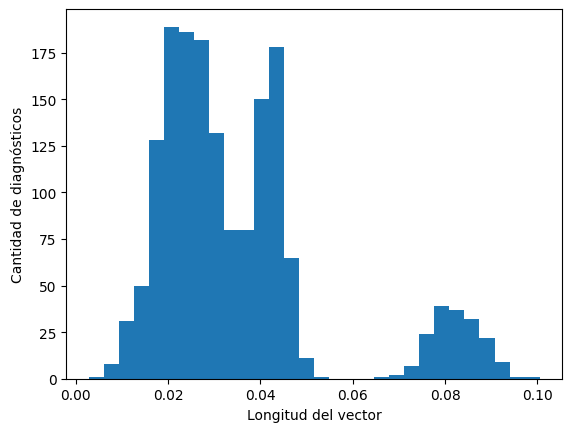

In [39]:
# Calcular y graficar la longitud de los vectores

import matplotlib.pyplot as plt

# Calcula la longitud de cada vector
vector_lengths = [np.linalg.norm(vec) for vec in diagnosticos_vec]

# Grafica un histograma de las longitudes
plt.hist(vector_lengths, bins=30)
plt.xlabel('Longitud del vector')
plt.ylabel('Cantidad de diagnósticos')
plt.show();

In [40]:
# Visualizar los vectores con PCA

from sklearn.decomposition import PCA

# Reduce la dimensionalidad a 2
pca = PCA(n_components=2)
diagnosticos_pca = pca.fit_transform(diagnosticos_vec)

# Grafica los vectores en 2D
plt.scatter(diagnosticos_pca[:, 0], diagnosticos_pca[:, 1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4                                                                                             │
│    5 # Reduce la dimensionalidad a 2                                                             │
│    6 pca = PCA(n_components=2)                                                                   │
│ ❱  7 diagnosticos_pca = pca.fit_transform(diagnosticos_vec)                                      │
│    8                                                                                             │
│    9 # Grafica los vectores en 2D                                                                │
│   10 plt.scatter(diagnosticos_pca[:, 0], diagnosticos_pca[:, 1])                                 │
│                                                                                                  │
│ C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\utils\_set_output.py:140 in wrapped    │
│                                                                                                  │
│   137 │                                                                                          │
│   138 │   @wraps(f)                                                                              │
│   139 │   def wrapped(self, X, *args, **kwargs):                                                 │
│ ❱ 140 │   │   data_to_wrap = f(self, X, *args, **kwargs)                                         │
│   141 │   │   if isinstance(data_to_wrap, tuple):                                                │
│   142 │   │   │   # only wrap the first output for cross decomposition                           │
│   143 │   │   │   return (                                                                       │
│                                                                                                  │
│ C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\decomposition\_pca.py:462 in           │
│ fit_transform                                                                                    │
│                                                                                                  │
│   459 │   │   """                                                                                │
│   460 │   │   self._validate_params()                                                            │
│   461 │   │                                                                                      │
│ ❱ 462 │   │   U, S, Vt = self._fit(X)                                                            │
│   463 │   │   U = U[:, : self.n_components_]                                                     │
│   464 │   │                                                                                      │
│   465 │   │   if self.whiten:                                                                    │
│                                                                                                  │
│ C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\decomposition\_pca.py:485 in _fit      │
│                                                                                                  │
│   482 │   │   │   │   "TruncatedSVD for a possible alternative."                                 │
│   483 │   │   │   )                                                                              │
│   484 │   │                                                

# Error
Este error se produce cuando se está intentando aplicar PCA a una lista de vectores, pero algunos de estos vectores no son de la misma longitud o son `None`. El error puede deberse a que algunas de las palabras en los diagnósticos no están en el modelo Word2Vec, por lo que no se creó ningún vector para ellas.

>Para solucionar este problema, puede hacerse una comprobación adicional al calcular los vectores de los diagnósticos. Si el vector para un diagnóstico es `None` o tiene longitud cero, puede reemplazarse por un vector de ceros.

````python
diagnosticos_vec = []
for i in range(tfidf.shape[0]):
    tfidf_diag = tfidf.getrow(i)
    words_vecs = [word_to_vec[word] * tfidf_diag[0, vectorizer.vocabulary_[word]] 
                  for word in diagnosticos_split[i] if word in word_to_vec]
    if words_vecs:
        diag_vec = np.mean(words_vecs, axis=0)
    else:
        diag_vec = np.zeros(model.vector_size)  # reemplaza vectores vacíos por vectores de ceros
    diagnosticos_vec.append(diag_vec)
````

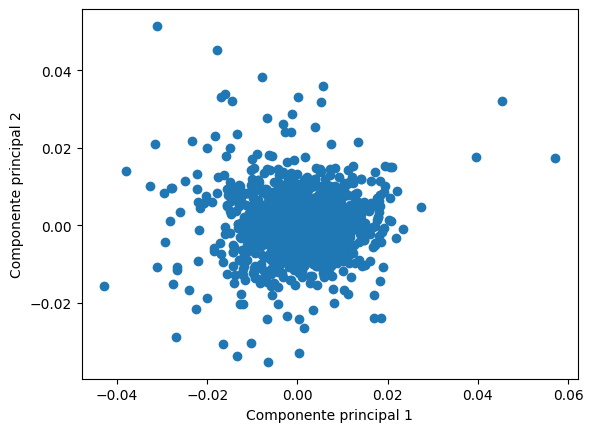

In [41]:
# Visualizar los vectores con PCA

from sklearn.decomposition import PCA

# Vectores con la misma longitud
diagnosticos_vec = []
for i in range(tfidf.shape[0]):
    tfidf_diag = tfidf.getrow(i)
    words_vecs = [word_to_vec[word] * tfidf_diag[0, vectorizer.vocabulary_[word]] 
                  for word in diagnosticos_split[i] if word in word_to_vec]
    if words_vecs:
        diag_vec = np.mean(words_vecs, axis=0)
    else:
        diag_vec = np.zeros(model.vector_size)  # reemplaza vectores vacíos por vectores de ceros
    diagnosticos_vec.append(diag_vec)
    
# Reduce la dimensionalidad a 2
pca = PCA(n_components=2)
diagnosticos_pca = pca.fit_transform(diagnosticos_vec)

# Grafica los vectores en 2D
plt.scatter(diagnosticos_pca[:, 0], diagnosticos_pca[:, 1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [42]:
import plotly.graph_objects as go

# Reduce la dimensionalidad a 3
pca = PCA(n_components=3)
diagnosticos_pca = pca.fit_transform(diagnosticos_vec)

# Crea el gráfico de dispersión 3D
fig = go.Figure(data=[go.Scatter3d(
    x=diagnosticos_pca[:, 0],
    y=diagnosticos_pca[:, 1],
    z=diagnosticos_pca[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color='blue',                # color de los puntos
        opacity=0.8
    )
)])

# Actualiza los ejes del gráfico
fig.update_layout(
    scene = dict(
        xaxis_title='1',
        yaxis_title='2',
        zaxis_title='3'
    )
)

fig.show()


In [43]:
import plotly.graph_objects as go

# Reduce la dimensionalidad a 3
pca = PCA(n_components=3)
diagnosticos_pca = pca.fit_transform(diagnosticos_vec)

# Crea el gráfico de dispersión 3D
fig = go.Figure(data=[go.Scatter3d(
    x=diagnosticos_pca[:, 0],
    y=diagnosticos_pca[:, 1],
    z=diagnosticos_pca[:, 2],
    mode='markers',
    marker=dict(
        size=6,
        color=diagnosticos_pca[:, 2],   # utiliza la tercera componente para el color
        colorscale='Viridis',            # elige una escala de colores
        opacity=0.8
    )
)])

# Actualiza los ejes del gráfico
fig.update_layout(
    scene = dict(
        xaxis_title='Componente principal 1',
        yaxis_title='Componente principal 2',
        zaxis_title='Componente principal 3',
        aspectmode='cube'                # hace que los ejes tengan la misma escala
    ),
    margin=dict(l=0, r=0, b=0, t=0),    # elimina los márgenes alrededor del gráfico
    scene_camera=dict(eye=dict(x=1.5, y=1.5, z=0.8))   # ajusta la posición inicial de la cámara
)

fig.show()

# la opción aspectmode='cube' es para hacer que los ejes tengan la misma escala,
# lo que puede hacer que la visualización sea más fácil de interpretar.


# Vectores

### 1. Máximo: en lugar de tomar el promedio de los vectores de palabras, podrías tomar el máximo de cada componente de los vectores de palabras. Este enfoque podría capturar la "palabra más importante" en cada dimensión del espacio vectorial.

### 2. Suma: podrías sumar los vectores de las palabras, lo que daría más peso a los diagnósticos con más palabras.

### 3. Concatenación: si el tamaño de tus vectores es pequeño, podrías considerar concatenar los vectores de las palabras en lugar de promediarlos. Esto resultaría en vectores de diagnóstico más grandes, pero también podría capturar más información.

### 4. Promedio

# 1. Máximo (toma el valor máximo de cada dimensión a través de todas las palabras en el diagnóstico)


In [44]:
import numpy as np

diagnosticos_vec_max = [np.max([model.wv[word] for word in diagnostico], axis=0) 
                        if diagnostico else np.zeros(model.vector_size) 
                        for diagnostico in diagnosticos_split]

In [45]:
from sklearn.cluster import KMeans

# Entonces podemos entrenar un modelo KMeans en estos vectores.
kmeans = KMeans(n_clusters=5)  # Ajusta este número a la cantidad de grupos que creas adecuada
kmeans.fit(diagnosticos_vec_max)

# Ahora podemos obtener las etiquetas de los grupos para cada diagnóstico
labels = kmeans.labels_

[06/27/23 16:01:36] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\cluster\_kme                
                             ans.py:870: FutureWarning:                                                            
                                                                                                                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                                                                                                                   
                                                                                                                   

# 2. Suma (suma los vectores de todas las palabras en el diagnóstico)

In [46]:
diagnosticos_vec_sum = [np.sum([model.wv[word] for word in diagnostico], axis=0) for diagnostico in diagnosticos_split]

# 3. Concatenación (concatena los vectores de todas las palabras en el diagnóstico)

Este método requerirá que todas las listas de diagnósticos tengan la misma longitud (es decir, el mismo número de palabras). Si no es así, tendrás que rellenar las listas más cortas con algún valor (como un vector de ceros).

> Este último método puede resultar en vectores muy largos si los diagnósticos contienen muchas palabras, lo que puede hacer que los modelos de aprendizaje automático sean más difíciles de entrenar.

In [47]:
from keras.preprocessing.sequence import pad_sequences

# Asumimos que 'max_len' es la longitud del diagnóstico más largo en 'diagnosticos_split'
max_len = max([len(diagnostico) for diagnostico in diagnosticos_split])

diagnosticos_pad = pad_sequences(diagnosticos_split, maxlen=max_len, dtype='float32', padding='post')
'''pad_sequences se utiliza para garantizar que todas las secuencias (en este caso, listas de vectores de palabras) 
tengan la misma longitud añadiendo "relleno" según sea necesario. Este relleno se hace con vectores de ceros, 
que son de tipo float32, para que coincidan con el tipo de datos de los vectores de palabras existentes.'''

diagnosticos_vec_concat = [np.concatenate([model.wv[word] for word in diagnostico]) for diagnostico in diagnosticos_pad]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 from keras.preprocessing.sequence import pad_sequences                                      │
│    2                                                                                             │
│    3 # Asumimos que 'max_len' es la longitud del diagnóstico más largo en 'diagnosticos_split    │
│    4 max_len = max([len(diagnostico) for diagnostico in diagnosticos_split])                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ModuleNotFoundError: No module named 'keras'

# 4. Promedio (promediando los vectores de todas las palabras en cada diagnóstico)

In [48]:
diagnosticos_vec_mean = [np.mean([model.wv[word] for word in diagnostico], axis=0) 
                         if diagnostico else np.zeros(model.vector_size) 
                         for diagnostico in diagnosticos_split]

>Ahora que tenemos los vectores de diagnóstico (ya sea máximo, suma, promedio o concatenación), pueden usarse como entrada para un algoritmo de aprendizaje automático o análisis de datos. Por ejemplo, estos vectores pueden alimentar a un algoritmo de clustering para agrupar diagnósticos similares, o a un algoritmo de clasificación para predecir alguna etiqueta basada en el texto del diagnóstico.

# Resumen vectores

Los vectores que se han generado representan la semántica de los diagnósticos médicos en un espacio de características numéricas. Ahora pueden aplicarse una variedad de técnicas de aprendizaje automático y análisis de datos para explorar y hacer predicciones basadas en estos vectores. Por ejemplo:

1. **Agrupación (Clustering)**: Podrían usarse algoritmos de clustering como K-means, DBSCAN, o Agglomerative Clustering para agrupar diagnósticos similares. Esto puede ser útil para descubrir grupos de diagnósticos que son semánticamente similares.

2. **Reducción de dimensionalidad y visualización**: Podrían usarse técnicas de reducción de dimensionalidad como PCA, t-SNE, o UMAP para visualizar tus datos en 2D o 3D. Esto puede ayudar a entender la estructura y las relaciones entre los diagnósticos.

3. **Clasificación**: Si existen etiquetas para los diagnósticos (por ejemplo, si se sabe a qué categoría de enfermedad pertenece cada diagnóstico), podría entrenarse un modelo de clasificación para predecir estas etiquetas. Algunos algoritmos que podrían considerarse incluyen regresión logística, máquinas de vectores de soporte (SVM), árboles de decisión, y redes neuronales.

4. **Regresión**: Si hay una variable objetivo continua (por ejemplo, la duración del tratamiento o el costo del tratamiento), podría entrenarse un modelo de regresión para predecir esta variable basándote en el diagnóstico.

5. **Análisis de sentimientos**: Aunque los diagnósticos médicos no suelen tener un "sentimiento" en el mismo sentido que las reseñas de productos o los tweets, podría ser interesante explorar si ciertas palabras o frases están asociadas con resultados más positivos o negativos.

# 1. Agupación (Clustering)

In [49]:
from sklearn.cluster import KMeans

# Primero, necesitamos convertir nuestros diagnósticos a vectores.
# Podemos hacer esto promediando los vectores de todas las palabras en cada diagnóstico.
diagnosticos_vec = [np.mean([model.wv[word] for word in diagnostico], axis=0) for diagnostico in diagnosticos_split]

# Entonces podemos entrenar un modelo KMeans en estos vectores.
kmeans = KMeans(n_clusters=5)  # Ajusta este número a la cantidad de grupos que creas adecuada
kmeans.fit(diagnosticos_vec)

# Ahora podemos obtener las etiquetas de los grupos para cada diagnóstico
labels = kmeans.labels_


[06/27/23 16:02:01] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\numpy\core\fromnumer                
                             ic.py:3504: RuntimeWarning:                                                           
                                                                                                                   
                             Mean of empty slice.                                                                  
                                                                                                                   
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\numpy\core\_methods.                
                             py:129: RuntimeWarning:                                                               
                                                                                                                   
                             invalid value encountered in scalar divide                                            
                                                                                                                   
                                                                                                                   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:9                                                                                    │
│                                                                                                  │
│    6                                                                                             │
│    7 # Entonces podemos entrenar un modelo KMeans en estos vectores.                             │
│    8 kmeans = KMeans(n_clusters=5)  # Ajusta este número a la cantidad de grupos que creas ad    │
│ ❱  9 kmeans.fit(diagnosticos_vec)                                                                │
│   10                                                                                             │
│   11 # Ahora podemos obtener las etiquetas de los grupos para cada diagnóstico                   │
│   12 labels = kmeans.labels_                                                                     │
│                                                                                                  │
│ C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\cluster\_kmeans.py:1417 in fit         │
│                                                                                                  │
│   1414 │   │   """                                                                               │
│   1415 │   │   self._validate_params()                                                           │
│   1416 │   │                                                                                     │
│ ❱ 1417 │   │   X = self._validate_data(                                                          │
│   1418 │   │   │   X,                                                                            │
│   1419 │   │   │   accept_sparse="csr",                                                          │
│   1420 │   │   │   dtype=[np.float64, np.float32],                                               │
│                                                                                                  │
│ C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\base.py:565 in _validate_data          │
│                                                                                                  │
│    562 │   │   if no_val_X and no_val_y:                                                         │
│    563 │   │   │   raise ValueError("Validation should be done on X, y or both.")                │
│    564 │   │   elif not no_val_X and no_val_y:                                                   │
│ ❱  565 │   │   │   X = check_array(X, input_name="X", **check_params)                            │
│    566 │   │   │   out = X                                                                       │
│    567 │   │   elif no_val_X and not no_val_y:                                                   │
│    568 │   │   │   y = _check_y(y, **check_params)                                               │
│                                                                                                  │
│ C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data                                      │
│ Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\utils\validation.py:879 in check_array │
│                                                                                                  │
│    876 │   │   │   │   │   │   )                                                                 │
│    877 │   │   │   │   │   array = xp.astype(array, dtype, copy=False)                           │
│    878 │   │   │   │   else:                                                                     │
│ ❱  879 │   │   │   │   │   array = _asarray_with_order(arra

In [50]:
# Filtramos los diagnósticos vacíos
diagnosticos_split = [diagnostico for diagnostico in diagnosticos_split if diagnostico]

# Luego, volvemos a calcular los vectores de diagnósticos
diagnosticos_vec = [np.mean([model.wv[word] for word in diagnostico if word in model.wv.key_to_index], axis=0)
                    for diagnostico in diagnosticos_split]

In [51]:
from sklearn.cluster import KMeans

# Primero, necesitamos convertir nuestros diagnósticos a vectores.
# Podemos hacer esto promediando los vectores de todas las palabras en cada diagnóstico.
diagnosticos_vec = [np.mean([model.wv[word] for word in diagnostico], axis=0) for diagnostico in diagnosticos_split]

# Entonces podemos entrenar un modelo KMeans en estos vectores.
kmeans = KMeans(n_clusters=5)  # Ajusta este número a la cantidad de grupos que creas adecuada
kmeans.fit(diagnosticos_vec)

# Ahora podemos obtener las etiquetas de los grupos para cada diagnóstico
labels = kmeans.labels_

[06/27/23 16:02:12] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\cluster\_kme                
                             ans.py:870: FutureWarning:                                                            
                                                                                                                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                                                                                                                   
                                                                                                                   

In [53]:
# Crea un diccionario donde las llaves son las etiquetas del cluster y los valores son listas de diagnósticos pertenecientes a ese cluster
clusters = {i: [] for i in range(5)}  # Asegúrate de cambiar el rango para que coincida con el número de clusters que estás usando

for diagnostico, label in zip(diagnosticos_split, labels):
    clusters[label].append(' '.join(diagnostico))

# Ahora puedes imprimir los diagnósticos en cada cluster
for label, diagnosticos in clusters.items():
    print(f'Cluster {label}:')
    for diagnostico in diagnosticos:
        print(f'  {diagnostico}')


Cluster 0:
  ca orl
  ca broncogenico
  adenoca colon iv
  ca prostata
  ca próstata
  ca mama
  ca timo
  ca endometrio
  ca pulmon
  ca colon
  ca sigma
  ca vejiga
  tratamiento antibiotico iv
  ca gastrico
  ca pulmon estadio iv
  adenocarcino colon estadio iv
  hepatocarcinoma estadio iv
  ca pancreas
  ca epidermoide sien estadio iv
  ca laringe
  neoplasia renal con metastasis hepaticas y pulmonares
  adenocarcinoma prostata estadio iv
  neoplasia pancreas
  adenocarcinoma gastrico estadio iv
  adenocarcinoma colñom estadio iv
  adernocarcinoma gastrico estadio iv
  adenocarcinoma recto estadio iv
  adenocarcinoma ovarico estadio iv
  neoplasia vejiga estadio iv
  neoplasia rectoacvborncoaspiracionº
  ca esofago
  ca ovario
  adenocaercinoma colon estadio iv
  neoplasia colon estadio iv
  sde mielodisplasico
  ca epidermoide senos paranasales
  sospecha ca tiroides
  ca colon estadio iv
  epidermoide paranasales
  ca cervix est figo iv b
  ca renal estadio iv
  ca ocario estadío

In [54]:
for diagnostico, label in zip(diagnosticos_split, labels):
    clusters[label].append(' '.join(diagnostico))
    
    '''Estás iterando sobre tus diagnósticos y sus etiquetas de cluster correspondientes. 
    Para cada diagnóstico, transformas la lista de palabras en una cadena de texto (usando ' '.join(diagnostico)) 
    y la añades a la lista correspondiente en el diccionario clusters.
    
    Por ejemplo, si tienes un diagnóstico que es ["neoplasia", "pancreas"] y su etiqueta de cluster es 2,
    este diagnóstico se transformaría en la cadena de texto "neoplasia pancreas" y se añadiría a la lista de diagnósticos
    del cluster 2 en el diccionario clusters. Así, al final, tendrías un diccionario donde para cada cluster, 
    tienes una lista de todos los diagnósticos (como cadenas de texto) que pertenecen a ese cluster'''

También puedes querer investigar las palabras más representativas de cada cluster. Esto puede darte una idea de las características que el modelo está utilizando para distinguir entre los diferentes clusters. Aquí te dejo un código de ejemplo para hacer eso:

In [55]:
import collections
# Para cada cluster, encuentra las 10 palabras más comunes
for label, diagnosticos in clusters.items():
    # Juntamos todos los diagnósticos en una sola lista de palabras
    palabras = [palabra for diagnostico in diagnosticos for palabra in diagnostico.split()]
    
    # Contamos las ocurrencias de cada palabra
    conteo_palabras = collections.Counter(palabras)
    
    print(f'Cluster {label}:')
    for palabra, conteo in conteo_palabras.most_common(10):
        print(f'  {palabra}: {conteo}')


Cluster 0:
  ca: 326
  iv: 282
  estadio: 142
  est: 78
  colon: 64
  neoplasia: 54
  e: 32
  pulmon: 28
  epidermoide: 28
  prostata: 24
Cluster 1:
  epoc: 36
  sindrome: 32
  neumonia: 30
  cirrosis: 24
  pulmonar: 24
  linfoma: 22
  absceso: 22
  por: 22
  icc: 22
  cerebral: 20
Cluster 2:
  de: 444
  iv: 76
  cancer: 72
  estadio: 70
  ca: 66
  neoplasia: 40
  pulmon: 36
  adenocarcinoma: 34
  carcinoma: 30
  colon: 28
Cluster 3:
  cognitivo: 82
  deterioro: 76
  itu: 72
  cancer: 64
  renal: 36
  severo: 36
  neo: 30
  fragil: 28
  infección: 26
  demencia: 22
Cluster 4:
  infeccion: 96
  respiratoria: 70
  ulcera: 64
  aguda: 40
  ulceras: 40
  urinaria: 38
  por: 34
  isquemia: 32
  infección: 26
  adenoca: 26


* El Cluster 0 parece incluir diagnósticos relacionados con úlceras, cáncer, EPOC, cirrosis, demencia y abscesos.

* El Cluster 1 parece estar más centrado en el cáncer, con palabras clave como carcinoma, colon, pulmón, páncreas y próstata.

* El Cluster 2 tiene un enfoque en infecciones, enfermedades respiratorias y úlceras.

* El Cluster 3 parece incluir diagnósticos que mencionan estadios (probablemente de cáncer) y diversas condiciones específicas como el cáncer de colon y el adenocarcinoma de pulmón.

* El Cluster 4 parece estar relacionado con el deterioro cognitivo, infecciones del tracto urinario (ITU), y también menciona el cáncer y la neoplasia.

>Estos clusters pueden ser útiles para entender qué tipos de diagnósticos se agrupan juntos y podrían ayudar en tareas como el análisis de datos, la recomendación de tratamientos, o la identificación de patrones en los diagnósticos.

- Es importante recordar que estos clusters se basan en la similitud de las palabras en los diagnósticos, que no necesariamente reflejan la similitud en las condiciones médicas que representan. Por lo tanto, cualquier interpretación o aplicación de estos clusters debe hacerse con cuidado y, preferiblemente, con la validación de un experto médico.

# Funciones

> Cuando tenemos un modelo Word2Vec model y una lista de diagnósticos divididos en palabras data_split podemos realizar estas funciones

Estas funciones realizan los siguientes pasos:

````python
import numpy as np
from sklearn.cluster import KMeans
import collections

def create_vectors(model, data_split, method='mean'):
    if method == 'max':
        data_vec = [np.max([model.wv[word] for word in data_item], axis=0) 
                            if data_item else np.zeros(model.vector_size) 
                            for data_item in data_split]
    elif method == 'sum':
        data_vec = [np.sum([model.wv[word] for word in text if word in model.wv.vocab], axis=0) 
                    for text in data_split]
        
    elif method == 'mean':
        data_vec = [np.mean([model.wv[word] for word in data_item], axis=0) 
                            if data_item else np.zeros(model.vector_size) 
                            for data_item in data_split]
    return data_vec

def cluster_data(data_vec, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_vec)
    labels = kmeans.labels_
    return labels

def create_clusters(data_split, labels, n_clusters=5):
    clusters = {i: [] for i in range(n_clusters)}
    for data_item, label in zip(data_split, labels):
        clusters[label].append(' '.join(data_item))
    return clusters

def print_clusters(clusters):
    for label, data_items in clusters.items():
        print(f'Cluster {label}:')
        for data_item in data_items:
            print(f'  {data_item}')

def print_top_words(clusters, n_words=10):
    for label, data_items in clusters.items():
        words = [word for data_item in data_items for word in data_item.split()]
        word_counts = collections.Counter(words)
        print(f'Cluster {label}:')
        for word, count in word_counts.most_common(n_words):
            print(f'  {word}: {count}')

````

* **create_vectors**: Crea vectores para los diagnósticos utilizando el método especificado (máximo, suma, media).

* **cluster_diagnosticos**: Aplica el algoritmo KMeans a los vectores de los diagnósticos.

* **create_clusters**: Crea un diccionario donde las llaves son las etiquetas de los clusters y los valores son las listas de diagnósticos que pertenecen a cada cluster.

* **print_clusters**: Imprime los diagnósticos en cada cluster.

* **print_top_words**: Imprime las palabras más comunes en cada cluster.

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import collections

def create_vectors(model, diagnosticos_split, method='mean'):
    if method == 'max':
        diagnosticos_vec = [np.max([model.wv[word] for word in diagnostico], axis=0) 
                            if diagnostico else np.zeros(model.vector_size) 
                            for diagnostico in diagnosticos_split]
    elif method == 'sum':
        diagnosticos_vec = [np.sum([model.wv[word] for word in diagnostico], axis=0) 
                            for diagnostico in diagnosticos_split]
    elif method == 'mean':
        diagnosticos_vec = [np.mean([model.wv[word] for word in diagnostico], axis=0) 
                            if diagnostico else np.zeros(model.vector_size) 
                            for diagnostico in diagnosticos_split]
    return diagnosticos_vec

def cluster_diagnosticos(diagnosticos_vec, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(diagnosticos_vec)
    labels = kmeans.labels_
    return labels

def create_clusters(diagnosticos_split, labels, n_clusters=5):
    clusters = {i: [] for i in range(n_clusters)}
    for diagnostico, label in zip(diagnosticos_split, labels):
        clusters[label].append(' '.join(diagnostico))
    return clusters

def print_clusters(clusters):
    for label, diagnosticos in clusters.items():
        print(f'Cluster {label}:')
        for diagnostico in diagnosticos:
            print(f'  {diagnostico}')

def print_top_words(clusters, n_words=10):
    for label, diagnosticos in clusters.items():
        palabras = [palabra for diagnostico in diagnosticos for palabra in diagnostico.split()]
        conteo_palabras = collections.Counter(palabras)
        print(f'Cluster {label}:')
        for palabra, conteo in conteo_palabras.most_common(n_words):
            print(f'  {palabra}: {conteo}')

In [56]:
import numpy as np
from sklearn.cluster import KMeans
import collections

def create_vectors(model, data_split, method='mean'):
    if method == 'max':
        data_vec = [np.max([model.wv[word] for word in data_item], axis=0) 
                            if data_item else np.zeros(model.vector_size) 
                            for data_item in data_split]
    elif method == 'sum':
        data_vec = [np.sum([model.wv[word] for word in text if word in model.wv.key_to_index], axis=0) 
                    for text in data_split]
    elif method == 'mean':
        data_vec = [np.mean([model.wv[word] for word in data_item], axis=0) 
                            if data_item else np.zeros(model.vector_size) 
                            for data_item in data_split]
    return data_vec

def cluster_data(data_vec, n_clusters=5):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_vec)
    labels = kmeans.labels_
    return labels

def create_clusters(data_split, labels, n_clusters=5):
    clusters = {i: [] for i in range(n_clusters)}
    for data_item, label in zip(data_split, labels):
        clusters[label].append(' '.join(data_item))
    return clusters

def print_clusters(clusters):
    for label, data_items in clusters.items():
        print(f'Cluster {label}:')
        for data_item in data_items:
            print(f'  {data_item}')

def print_top_words(clusters, n_words=10):
    for label, data_items in clusters.items():
        words = [word for data_item in data_items for word in data_item.split()]
        word_counts = collections.Counter(words)
        print(f'Cluster {label}:')
        for word, count in word_counts.most_common(n_words):
            print(f'  {word}: {count}')

In [57]:
# El `model` es un modelo Word2Vec y `data_split` es una lista de diagnósticos divididos en palabras
data_split = diagnosticos_split
# Para el método 'mean'
data_vec_mean = create_vectors(model, data_split, method='mean')
labels_mean = cluster_data(data_vec_mean, n_clusters=5)
clusters_mean = create_clusters(data_split, labels_mean, n_clusters=5)
print_clusters(clusters_mean)
print("="*80)
print_top_words(clusters_mean)


[06/27/23 16:03:23] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\cluster\_kme                
                             ans.py:870: FutureWarning:                                                            
                                                                                                                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                                                                                                                   
                                                                                                                   

Cluster 0:
  melanoma vulvar
  cirrosis hepatica
  tumor cerebral
  neumonia
  niemannpick
  melanoma fosa nasal
  intolerancia oral
  esclerosis múltiple
  smd
  fractura cadera
  fallo cardiaco
  amputación
  fractura vertebral
  acv
  miocardiopatia hipertrófica
  sindrome general
  hepatopatia cronica
  melanoma
  ictus
  fa valvulopatia aortica ic
  sindrome febril irc
  caepidermoide labio
  sifilis terciaria cardiopatia congenita
  craneofaringioma
  mieloma multiple
  endocarditis
  oclusion intestinal
  lma
  ela
  insuficiencia cardiaca
  colangiocarcinima
  fractura d12
  ucera mid
  broncoaspiracion
  fibrosis pulmonar
  linfoma hodking
  trombocitemia esencial
  anemia cronicaneo colon
  alzheimertromboembolismo pulmonar
  linfoma bajo grado
  deteriioro cogitivo grave
  anoxia cerebral
  sindrome mielodisplasico
  gastroenteritis
  síndrome mielodisplásico
  talasemiasíndrome anemico
  insuficiencia cardiaca descompensada
  arteriopatia obliterante generalizada
  glioblas

In [60]:
# Reducir la dimensionalidad de los vectores a 2 dimensiones con PCA:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_vec_2d = pca.fit_transform(data_vec_mean)


In [61]:
# Crear un DataFrame de pandas con las coordenadas 2D y las etiquetas de los clusters:

import pandas as pd

df = pd.DataFrame(data_vec_2d, columns=['x', 'y'])
df['cluster'] = labels_sum


In [62]:
# Visualizar los clusters con Plotly:

import plotly.express as px

fig = px.scatter(df, x='x', y='y', color='cluster', width=800, height=600)
fig.update_traces(marker=dict(size=6))
fig.show()



[06/27/23 16:15:01] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\pandas\core\dtypes\c                
                             ast.py:1641: DeprecationWarning:                                                      
                                                                                                                   
                             np.find_common_type is deprecated.  Please use `np.result_type` or                    
                             `np.promote_types`.                                                                   
                             See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs                  
                             for more information.  (Deprecated NumPy 1.25)                                        
                                                                                                                   
                                                                                                                   

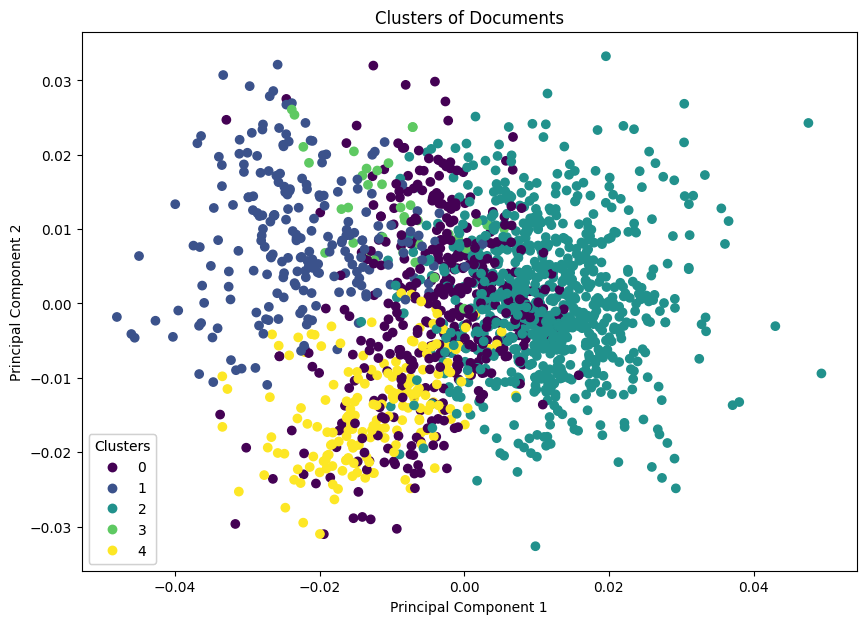

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis')
ax.set_title('Clusters of Documents')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# create legend as per color map
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

plt.show()


In [58]:
# Para el método 'max'
data_split = diagnosticos_split

data_vec_max = create_vectors(model, data_split, method='max')
labels_max = cluster_data(data_vec_max, n_clusters=5)
clusters_max = create_clusters(data_split, labels_max, n_clusters=5)
print_clusters(clusters_max)
print("="*80)
print_top_words(clusters_max)

[06/27/23 16:03:27] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\cluster\_kme                
                             ans.py:870: FutureWarning:                                                            
                                                                                                                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                                                                                                                   
                                                                                                                   

Cluster 0:
  ca orl
  melanoma vulvar
  ca broncogenico
  cirrosis hepatica
  cancer próstata
  tumor cerebral
  cancer colon
  ca próstata
  ca mama
  cancer pancreas
  ca timo
  infeccion respiratoria
  sdown
  bocio intratoracico
  sepsisi respiratoria
  intolerancia oral
  infeccion urinaria
  esclerosis múltiple
  úlceras mmii
  fractura cadera
  infección respiratoria
  infec resp
  ca endometrio
  cancer suprarrenal
  fractura vertebral
  ulceras vasculares
  deterioro cognitivo
  sindrome general
  masa abdominal
  hepatopatia cronica
  adenoca recto
  caepidermoide labio
  itu asintomática
  mieloma multiple
  endocarditis
  ca pulmon
  oclusion intestinal
  ca colon
  sepsis urinaria
  amputacion transmetatarsiana
  ca sigma
  ca vejiga
  cancer gastrico
  ca gastrico
  insuficiencia cardiaca
  infeccion bronquiectasias
  infeccion material
  fractura d12
  ucera mid
  fibrosis pulmonar
  anciano fragil
  linfoma hodking
  trombocitemia esencial
  neo colon
  alzheimertromboe

In [68]:
# Reducir la dimensionalidad de los vectores a 2 dimensiones con PCA:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_vec_2d = pca.fit_transform(data_vec_max)

In [69]:
import pandas as pd

df = pd.DataFrame(data_vec_2d, columns=['x', 'y'])
df['cluster'] = labels_sum

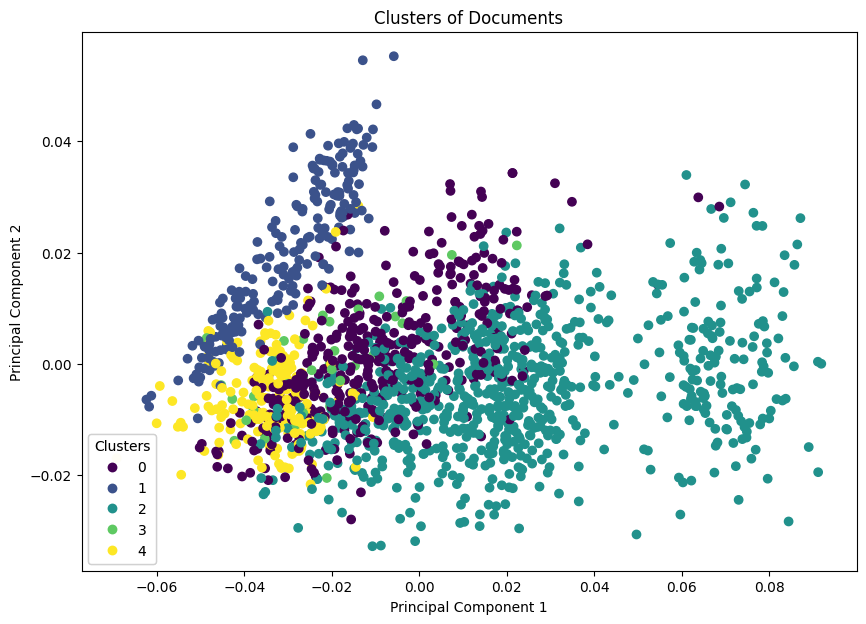

In [70]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis')
ax.set_title('Clusters of Documents')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# create legend as per color map
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

plt.show()

In [59]:
# Para el método 'sum'
data_split = diagnosticos_split

data_vec_sum = create_vectors(model, data_split, method='sum')
labels_sum = cluster_data(data_vec_sum, n_clusters=5)
clusters_sum = create_clusters(data_split, labels_sum, n_clusters=5)
print_clusters(clusters_sum)
print("="*80)
print_top_words(clusters_sum)

[06/27/23 16:03:29] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\sklearn\cluster\_kme                
                             ans.py:870: FutureWarning:                                                            
                                                                                                                   
                             The default value of `n_init` will change from 10 to 'auto' in 1.4.                   
                             Set the value of `n_init` explicitly to suppress the warning                          
                                                                                                                   
                                                                                                                   

Cluster 0:
  ca orl
  ca broncogenico
  deterioro estado general
  ca prostata
  cancer colon
  ca próstata
  ca mama
  cancer pancreas
  infección urinaria fallo cardiaco
  ca timo
  infeccion respiratoria
  bocio intratoracico
  infeccion urinaria
  itu
  infección respiratoria
  ca endometrio
  epoc e infección respiratoria
  infección herida quirúrgica
  epoc infección respiratoria
  diverticulitis aguda
  itu asintomática
  ca pulmon
  isquemia eeii
  ca colon
  amputacion transmetatarsiana
  ca sigma
  ca vejiga
  ca gastrico
  anciano fragil
  neo recto infeccion respiratoria
  deterioro estado general trastorno metabolico
  infeccion respiratoria alzheimer
  anemia proceso cronico demencia
  ulceras en miembro inferior derecho
  ca pancreas
  infeccion urinaria hemorragia digestiva
  neoplasia rectosepsi urinaria
  ca laringe
  neoplasia pancreas
  neoplasia rectoacvborncoaspiracionº
  oclusión intestinal esquizofrenia paranoide
  ca esofago
  ca ovario
  ca sigma met hepáticas

In [71]:
# Reducir la dimensionalidad de los vectores a 2 dimensiones con PCA:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_vec_2d = pca.fit_transform(data_vec_sum)

In [72]:
import pandas as pd

df = pd.DataFrame(data_vec_2d, columns=['x', 'y'])
df['cluster'] = labels_sum

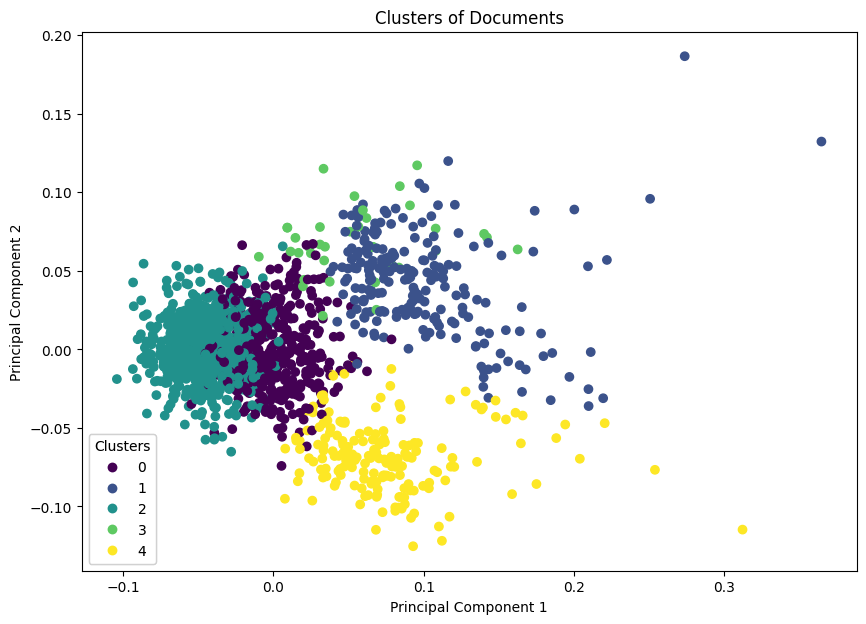

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(df['x'], df['y'], c=df['cluster'], cmap='viridis')
ax.set_title('Clusters of Documents')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

# create legend as per color map
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)

plt.show()

In [74]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

trace = go.Scatter(
    x = df['x'],
    y = df['y'],
    mode = 'markers',
    marker=dict(
        size=6,
        color = df['cluster'], # set color equal to a variable
        colorscale='Viridis',
        showscale=True
    )
)

data = [trace]

fig = go.Figure(data=data)

iplot(fig)


# Estrategia
Una estrategia que podrías considerar es usar una combinación de estas métricas para obtener una visión más completa de tus datos. Por ejemplo, podrías usar la métrica mean para identificar las palabras que son más representativas de cada cluster en promedio, y luego usar la métrica max para identificar los temas o categorías que son más comunes en tus datos. Luego, podrías usar la métrica sum para obtener una visión general de qué palabras son más prevalentes en tus datos.

In [75]:
df.head()

,x,y,cluster
0,-0.012770,-0.037113,0
1,-0.077913,-0.029102,2
2,-0.008753,-0.009587,0
3,-0.054859,-0.015472,2
4,0.139932,-0.017885,1


# Resumen

* **Creación de vectores**: Utiliza la función `create_vectors` para transformar los datos de texto en vectores. Esta función requiere el modelo de incrustación de palabras (en este caso, un modelo Word2Vec entrenado con Gensim) y los datos de texto que se desean transformar. Además, puede especificarse un método para combinar las incrustaciones de palabras individuales en una sola incrustación por documento (por ejemplo, sumando o promediando las incrustaciones de palabras).

````python
# Para el método 'sum'
data_split = diagnosticos_split
data_vec_sum = create_vectors(model, data_split, method='sum')
````
* **Clustering**: Una vez que se tienen los datos en forma vectorial, puede utilizarse cualquier algoritmo de clustering. En este caso, se está utilizando KMeans de la biblioteca scikit-learn. Necesitará especificarse el número de clusters que se desea (en este caso, 5).
````python
labels_sum = cluster_data(data_vec_sum, n_clusters=5)
````

* **Creación de clusters**: Después de realizar el clustering, pueden organizarse los datos originales en clusters de acuerdo con las etiquetas de cluster que se han obtenido.
````python
clusters_sum = create_clusters(data_split, labels_sum, n_clusters=5)
````

* **Visualización de resultados**: Finalmente, pueden imprimirse los resultados de los clusters y mostrar las palabras más comunes en cada cluster.
````python
print_clusters(clusters_sum)

print_top_words(clusters_sum)
````

